# Задача №1

In [1]:
import pandas as pd
import numpy as np

import scipy.stats as ss
from scipy.stats import norm, mannwhitneyu
from tqdm.auto import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
url   = '/home/jupyter-v.kulagin-10/shared/problem1-reg_data.csv'
url_2 = '/home/jupyter-v.kulagin-10/shared/problem1-auth_data.csv'

In [3]:
df_reg  = pd.read_csv(url, sep=';')
df_auth = pd.read_csv(url_2, sep=';')
df_reg['reg_ts']   = pd.to_datetime(df_reg.reg_ts, unit='s')  
df_auth['auth_ts'] = pd.to_datetime(df_auth.auth_ts, unit='s')  

In [4]:
df_reg.shape[0] == df_reg.uid.nunique()  # проверка ID клиентов на наличие дублей

True

In [19]:
date_format = 'M'  # выберите период когорты где 'Y'-год, 'M'-месяц, 'W'-неделя, 'D'-день

period = "'2018' <= reg_ts <= '2019'"  # Выберите период, за который хотите посмотреть retention
                                       # прим.("'2018-01-01' <= reg_ts <= '2019-01-01'")

In [13]:

def retention_rate(df_reg, df_auth):
    # изменяем даты на период определенной когорты
    df_reg['reg_ts']   = df_reg['reg_ts'].dt.to_period(date_format).apply(lambda r: r.start_time) 
    df_auth['auth_ts'] = df_auth['auth_ts'].dt.to_period(date_format).apply(lambda r: r.start_time)

    df_merge = df_auth.merge(df_reg, how='left', on='uid') # объединяю таблицу событий с датой регистрации по когортам

    # добавляем порядковый номер выбраному периоду 
    df_merge['lifetime'] = ((df_merge['auth_ts'] - df_merge['reg_ts'])/np.timedelta64(1, date_format)).round().astype(int)

    # Строим таблицу retention по количеству пользователей
    retention = df_merge.query(period).pivot_table(index='reg_ts', columns='lifetime', values='uid', aggfunc='nunique')
    return retention

def retention_rate_percent(df_reg, df_auth):
    # изменяем даты на период определенной когорты
    df_reg['reg_ts']   = df_reg['reg_ts'].dt.to_period(date_format).apply(lambda r: r.start_time) 
    df_auth['auth_ts'] = df_auth['auth_ts'].dt.to_period(date_format).apply(lambda r: r.start_time)

    df_merge = df_auth.merge(df_reg, how='left', on='uid')  # объединяю таблицу событий с датой регистрации по когортам

    # добавляем порядковый номер выбраному периоду 
    df_merge['lifetime'] = ((df_merge['auth_ts'] - df_merge['reg_ts'])/np.timedelta64(1, date_format)).round().astype(int)

    # Строим таблицу retention по количеству пользователей
    retention = df_merge.query(period).pivot_table(index='reg_ts', columns='lifetime', values='uid', aggfunc='nunique')

    # Строим таблицу retention по проценту пользователей
    retention_percent = retention.apply(lambda row: (row.iloc[0::]/row.iloc[0])*100, axis=1).round(0)
    
    return retention_percent   

# смотрю на retention % на графике
def heatmap(retention_rate_percent):
    plt.figure(figsize=(24, 12))
    plt.title('Retention %' , fontsize=24)
    plt.ylabel('cohorts', fontsize=18)
    plt.xlabel('number', fontsize=18)
    ax = sns.heatmap(retention_rate_percent, linewidth=1, annot=True, fmt='.0f', cmap='BuPu', linecolor='black', annot_kws={"size":15})
    plt.show()
                


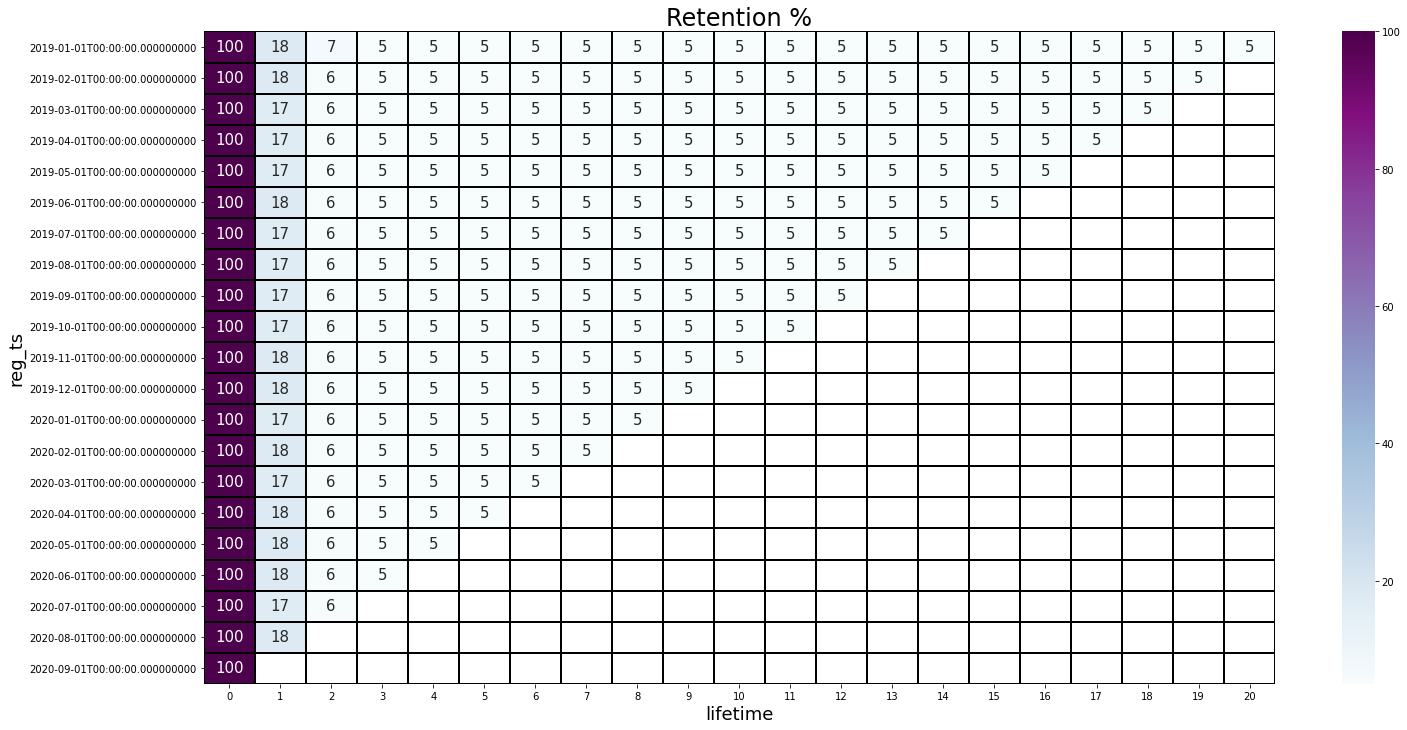

In [7]:
heatmap(retention_rate_percent(df_reg, df_auth))  # График retention в %

In [8]:
retention_rate(df_reg, df_auth)  # таблица retention по пользователям

lifetime,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
reg_ts,,,,,,,,,,,,,,,,,,,,,
2019-01-01,18510.0,3284.0,1240.0,945.0,945.0,945.0,945.0,945.0,945.0,945.0,...,945.0,945.0,945.0,945.0,945.0,945.0,945.0,945.0,945.0,945.0
2019-02-01,17549.0,3218.0,1108.0,907.0,907.0,907.0,907.0,907.0,907.0,907.0,...,907.0,907.0,907.0,907.0,907.0,907.0,907.0,907.0,907.0,NaN
2019-03-01,20396.0,3528.0,1222.0,990.0,990.0,990.0,990.0,990.0,990.0,990.0,...,990.0,990.0,990.0,990.0,990.0,990.0,990.0,990.0,NaN,NaN
2019-04-01,20752.0,3627.0,1298.0,1055.0,1055.0,1055.0,1055.0,1055.0,1055.0,1055.0,...,1055.0,1055.0,1055.0,1055.0,1055.0,1055.0,1055.0,NaN,NaN,NaN
2019-05-01,22548.0,3940.0,1397.0,1123.0,1123.0,1123.0,1123.0,1123.0,1123.0,1123.0,...,1123.0,1123.0,1123.0,1123.0,1123.0,1123.0,NaN,NaN,NaN,NaN
2019-06-01,22942.0,4127.0,1451.0,1191.0,1191.0,1191.0,1191.0,1191.0,1191.0,1191.0,...,1191.0,1191.0,1191.0,1191.0,1191.0,NaN,NaN,NaN,NaN,NaN
2019-07-01,24926.0,4310.0,1540.0,1259.0,1259.0,1259.0,1259.0,1259.0,1259.0,1259.0,...,1259.0,1259.0,1259.0,1259.0,NaN,NaN,NaN,NaN,NaN,NaN
2019-08-01,26230.0,4487.0,1604.0,1268.0,1268.0,1268.0,1268.0,1268.0,1268.0,1268.0,...,1268.0,1268.0,1268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-09-01,26689.0,4645.0,1677.0,1364.0,1364.0,1364.0,1364.0,1364.0,1364.0,1364.0,...,1364.0,1364.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
retention_rate_percent(df_reg, df_auth)  # Таблица retention в %

lifetime,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
reg_ts,,,,,,,,,,,,,,,,,,,,,
2018-01-01,100.0,17.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0
2018-02-01,100.0,18.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN
2018-03-01,100.0,18.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN
2018-04-01,100.0,18.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN
2018-05-01,100.0,17.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN
2018-06-01,100.0,18.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN
2018-07-01,100.0,17.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-08-01,100.0,17.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-09-01,100.0,17.0,6.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,...,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


*
   С помощью данной функции можно посмотреть retention за выбранный период времени а так же выбрать когорты по дням, неделям или годам. После выбрать визуализацию либо в табличном варианте либо тепловая карта.                               
  * Чтобы отследить общую картину вовлеченности и определиться на каком этапе улучшать показатели retention, я бы рекомендовал недельный или месячный retention

# Задача № 2

In [21]:
df = pd.read_csv('/home/jupyter-v.kulagin-10/final_projects/problem2.csv', sep=';')

In [22]:
df['testgroup'] = df.testgroup.apply(str) 

In [23]:
df.user_id.count() == df.user_id.nunique()  # проверяю ID на наличие дублей

True

In [24]:
# считаю кол-во пользователей в каждой группе
users_by_groups = df.groupby('testgroup', as_index=False).agg({'user_id':'count'}) 

# считаю кол-во платящих пользователей и выручку по группам
paid_users_revenue = df.query("revenue > 0").groupby('testgroup', as_index=False) \
                       .agg({'user_id': 'count', 'revenue': 'sum'}) \
                       .rename(columns={'user_id': 'paid_users', 'revenue': 'total_revenue'})

# собирою агрегированные данные в одну таблицу
users_by_groups = users_by_groups.merge(paid_users_revenue, on='testgroup')

# считаю метрики по каждой группе
users_by_groups ['ARPU']       = round(users_by_groups.total_revenue / users_by_groups.user_id, 2)
users_by_groups ['ARPPU']      = round(users_by_groups.total_revenue / users_by_groups.paid_users,2)
users_by_groups ['conversion'] = round(users_by_groups.paid_users / users_by_groups.user_id * 100, 2)

# считаю разницу по метрикам между группами
new_row = [{'testgroup': 'diff_per_groups',
            'user_id':       round((users_by_groups.user_id.iloc[1] - users_by_groups.user_id.iloc[0]) / users_by_groups.user_id.iloc[1] * 100, 2),
            'paid_users':    round((users_by_groups.paid_users.iloc[0] - users_by_groups.paid_users.iloc[1]) / users_by_groups.paid_users.iloc[0] * 100,2),
            'total_revenue': round((users_by_groups.total_revenue.iloc[1] - users_by_groups.total_revenue.iloc[0]) / users_by_groups.total_revenue.iloc[1] * 100, 2),
            'ARPU':          round((users_by_groups.ARPU.iloc[1] - users_by_groups.ARPU.iloc[0]) / users_by_groups.ARPU.iloc[1] * 100, 0),
            'ARPPU':         round((users_by_groups.ARPPU.iloc[1] - users_by_groups.ARPPU.iloc[0]) / users_by_groups.ARPPU.iloc[1] * 100, 0),
            'conversion':    users_by_groups.conversion.iloc[0] - users_by_groups.conversion.iloc[1]}]

# добавляю в таблицу разницу (в процентах) между группами
new_diff = pd.DataFrame(new_row, index = [2])
users_by_groups = users_by_groups.append(new_diff)

users_by_groups

,testgroup,user_id,paid_users,total_revenue,ARPU,ARPPU,conversion
0,a,202103.00,1928.00,5136189.00,25.41,2664.00,0.95
1,b,202667.00,1805.00,5421603.00,26.75,3003.66,0.89
2,diff_per_groups,0.28,6.38,5.26,5.00,11.00,0.06


Из получившейся таблицы можно выделить некоторые наблюдения                                                            
1. общее кол-во пользователей в группах различается не существено
2. ARPU в группе b выше на 5%
3. ARPPU в группе b выше на 11%
4. А вот конверсия в покупку в гуппе a выше примерно на 6%

Далее делаю визуализацию суммы выручки по пользователям

In [25]:
# разделяю данные по группам
df_1 = df.query("testgroup == 'a'")
df_2 = df.query("testgroup == 'b'")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8cf1693128>]],
      dtype=object)

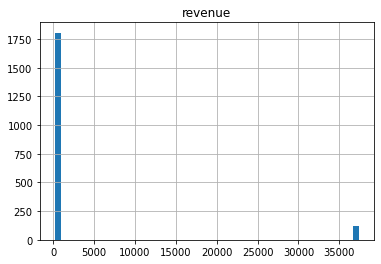

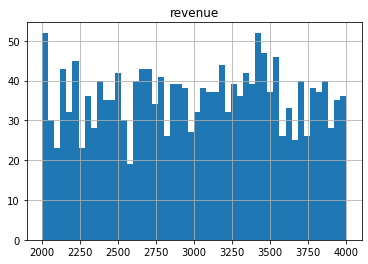

In [26]:
# Строю гистограммы по группам
df_1.query("revenue > 0").hist('revenue', bins=50)
df_2.query("revenue > 0").hist('revenue', bins=50)

Из гистограмм видно, что характер и сумма покупок имеют различия в группах.                                                
Предлагаю построить scatterplot для того, чтобы более детально посмотреть на характер трат пользователей

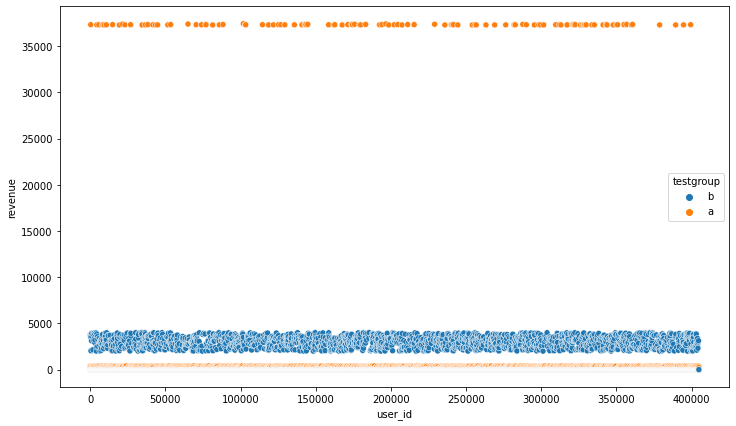

In [27]:
plt.figure(figsize=(12, 7))
ax = sns.scatterplot(x="user_id", y="revenue", hue="testgroup", data=df)

In [28]:
# Доля пользователей, из группы a, которые потратили более 5000
round(df_1.query('revenue > 5000').shape[0] / users_by_groups[users_by_groups['testgroup'] == 'a'].user_id * 100, 2)

0    0.06
Name: user_id, dtype: float64

In [29]:
# Доля всей выручки клиентов, которые потритили более 5000
round(df_1.query('revenue > 5000').revenue.sum() / df_1.revenue.sum() * 100, 2)

89.37

Из грфика видно, что траты пользователей из группы b лежат в одном диапазоне(за исключением отдельного выброса внизу). А вот пользователи группы a имеют разные коридоры трат (либо заметно низкие, либо заметно высокие)

Далее я буду смотреть есть ли у нас стат значимые различия между группами после проведения эксперимента

In [ ]:
# Делаю выборку из наших групп
test_norm_a = df_1.revenue.sample(1000, random_state=17)
test_norm_b = df_2.revenue.sample(1000, random_state=17)

провожу тест Шапиро-Уилка на нормальность распределения данных, границу значимости буду считать alpha = 0.05

In [31]:
ss.shapiro(test_norm_a)

(0.06614720821380615, 0.0)

In [32]:
ss.shapiro(test_norm_b)

(0.06715953350067139, 0.0)

Тест Шапиро-Уилка показал, что в обеих группах p_value < 0.05
Делаю вывод, что данные распределены не нормально. 
Поэтому для определения различий между группами предлагаю использовать непараметрический критерий Манна - Уитни и bootstrap с уровнем значимости p_value < 0.05

In [33]:
stat, p = mannwhitneyu(df_1.revenue, df_2.revenue)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=20468349325.000, p=0.031


U - критерий показывает нам p_value < 0.05, что позволяет нам сделать вывод, что группы a и b стат значимо различаются
Теперь проведем bootstrap тест

In [34]:
def get_bootstrap(
    data_column_1 = df_1.revenue,  # числовые значения первой выборки
    data_column_2 = df_2.revenue,  # числовые значения второй выборки
    boot_it = 1000,  # количество бутстрэп-подвыборок
    statistic = np.mean,  # интересующая нас статистика
    bootstrap_conf_level = 0.95  # уровень значимости
):
    boot_len = max([len(data_column_1), len(data_column_2)])
    boot_data = []
    for i in tqdm(range(boot_it)):  # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            boot_len, 
            replace = True  # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            boot_len, 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1-samples_2))  # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    ci = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    plt.hist(pd_boot_data[0], bins = 50)
    
    plt.style.use('ggplot')
    plt.vlines(ci,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "ci": ci, 
            "p_value": p_value}

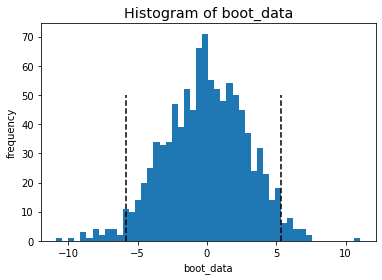

{'boot_data': [5.300648679138855,
  5.0147647486677585,
  -5.033413655413328,
  -2.865553702814901,
  1.5364888200570996,
  -5.466356263885246,
  -1.2631282069044003,
  -2.438345793976339,
  3.6738544207656494,
  5.073259674522397,
  4.48948803332954,
  -4.89295557215875,
  0.019608813327857577,
  -0.8802937116222916,
  -2.43366501239467,
  -1.4521061043131474,
  1.6660910525820993,
  3.2813317961633426,
  -0.9195657659708169,
  0.1914469354734962,
  -0.8271524915513376,
  2.132081166533896,
  2.0901273113214547,
  3.6038307199794164,
  1.8369742161175242,
  -1.5886998213782082,
  0.695066377045368,
  1.9774125074838078,
  -0.35415604914325866,
  -3.7408499626428107,
  1.759137667427005,
  -1.0486979411488202,
  -7.031093056510789,
  3.7670148389682487,
  -5.62268744155208,
  -4.853233252351524,
  0.8340004849012632,
  3.0313948828072816,
  0.3604746094813041,
  4.9210105738163215,
  1.19779023567191,
  0.9102042028074794,
  3.195721983345126,
  2.333067792165381,
  -0.4530709588675081

In [35]:
# сравниваю различия средних в группах по всем пользователям
get_bootstrap(
    data_column_1 = df_1.revenue,  # числовые значения первой выборки
    data_column_2 = df_1.revenue,  # числовые значения второй выборки
    boot_it = 1000,  # количество бутстрэп-подвыборок
    statistic = np.mean,  # интересующая нас статистика
    bootstrap_conf_level = 0.95
)

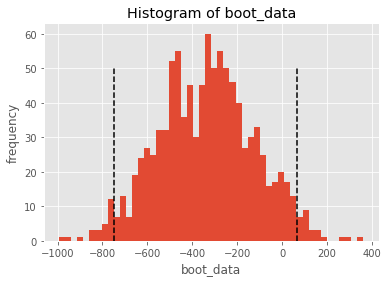

{'boot_data': [-460.1929460580913,
  -305.198132780083,
  -461.600622406639,
  -410.91960580912865,
  -363.63589211618256,
  -228.35114107883817,
  -642.7188796680498,
  -323.61358921161826,
  -305.728734439834,
  -99.06690871369294,
  -571.4455394190871,
  -251.1390041493776,
  -299.48599585062243,
  -301.3469917012448,
  -497.78526970954357,
  -437.6244813278008,
  -560.3495850622406,
  -687.4719917012449,
  -458.2951244813278,
  -680.63122406639,
  -611.3967842323651,
  -351.722510373444,
  50.60477178423236,
  19.21213692946058,
  -342.4896265560166,
  -364.6592323651452,
  -435.3646265560166,
  -448.8692946058091,
  -592.5248962655602,
  24.75051867219917,
  -719.4232365145228,
  -656.1441908713693,
  -715.6628630705394,
  -255.08713692946057,
  -518.6747925311204,
  -127.43620331950207,
  -612.0420124481328,
  -183.253112033195,
  -64.61410788381743,
  -606.2831950207469,
  -218.63796680497924,
  -481.31742738589213,
  -581.4569502074689,
  -520.1633817427386,
  12.40508298755186

In [36]:
# сравниваю различия средних в группах по платящим пользователям
get_bootstrap(
    data_column_1 = df_1.query("revenue > 0").revenue,  # числовые значения первой выборки
    data_column_2 = df_2.query("revenue > 0").revenue,  # числовые значения второй выборки
    boot_it = 1000,  # количество бутстрэп-подвыборок
    statistic = np.mean,  # интересующая нас статистика
    bootstrap_conf_level = 0.95)

После проведения bootstrap оценки средних как для всех пользователей так и только для платящих, наблюдается p_value > 0.05 и доверительные интервалы в обоих тестах включали ноль. Этот тест говорит нам о том, что значимых различий среди групп не наблюдается

# Вывод:
После проведения А/В теста у нас есть две группы к которым применялись различные пакеты акционных предложений. После подсчета метрик (ARPU, ARPPU, конверсия) и проведения стат тестов я могу сделать следующие выводы.                         
Пакеты акционных предложений повлияли на характер трат пользователей по разному.                                          
Видно что такие метррики как ARPU, ARPPU выше в группе b, но их конверсия ниже чем в группе a.                            
Это скорее всего связано с тем, что для группы a были предложены либо совсем дешевые пакеты (которые и позволили увеличить конверсию), либо достаточно дорогие (коверсия 0,06). Но ТОП клиенты в группе a принесли более 89% всех доходов.            
Из-за таких перекосов в тратах пользователей U-критерий показал значемые различия в группах, а bootstrap не показал различий.                                                                                                                 
Исходя из данных которые получились предлагаю проанализировать ТОП пользователей из группы a, выяснить какие отличительные особенности у них есть (география, пол, возраст, DAU, MAU, устройства) и разработать для них специальные пакеты предложений. А за основные пакеты предложений взять опыт группы b.                                                        
Поэтому было бы лучше разработать предложения, которые сохранят траты большей части пользователей как в группе b (так как конверсия по таким ценам не существенно отличается от конверсии по низкой цене). А также подобрать предложения для ТОП  пользователей которые готовы заплатить более высокую цену.                                                                
Считаю, что такой подход смог бы увеличть выручку на 80%

# Задача №3

Для того чтобы оценить результаты последнего прошедшего события я бы предложил смотреть на следующие метрики:
1. DAU - смотрим выросло ли среднее время в игре в течении дня
2. среднея продолжительность сессии - как долго пользователь остается в игре после запуска
3. среднее количество сессий в день - как часто запускается приложение (связано ли это с окончанием энергии в игре, или еще каких-то конечных ресурсов)
4. кол-во выданых монет - так же как и в реальной экономике нельзя допустить не контролируемый рост инфляции
5. среднее кол-во попыток прохождения каждого уровня - какой уровень самый сложный и на каком уровне сколько users отваливается
6. среднее время прохождения каждого уровня - оцениваем сложность уровня и удержание по времени
7. retention тех кто учавствовал в событии - во время и после завершения события
8. среднедневное кол-во показов рекламы (на день, на сессию) - стали ли мы больше показывать платной рекламы
9. среднедневное кол-во добровольных просмотров рекламы - готовы ли users смотреть платную рекламу в обмен на ништяки внутри игры
10. revenue общий и средний - для тех кто учавствовал в событии
11. конверсия в покупку - общесредняя конверсия, и конверсия из ранее не  платящих.
12. кол-во переходов из события в магазин покупок - смотрим конверсию на этапе воронки


При смене механики игры с откатом на уровни назад подойдут и предыдущие метрики, а так же можно добавить:
13. churn_rate - как изменился отток клиентов
14. закрытие приложения после неудачной попытки - как users реагируют на откаты уровней события